In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("spearman_corr.csv")
df_month

,August_3,November,November_3,March_3,April_2,July,August_2,October,April_10,September_5,...,February_4,June_3,April_11,March_5,July_5,September_2,February_5,July_3,April_9,August
0,-0.184693,-1.214892,-0.136173,0.014885,-0.653007,-0.164218,0.129304,0.901029,-0.692329,0.851391,...,-0.158691,-0.131733,0.859497,-1.225251,0.039187,-0.347332,-0.080097,0.260714,0.550376,0.070421
1,-0.184693,-1.214892,-0.136173,-0.009168,-0.907867,-0.164218,0.129304,0.901029,-1.001261,0.851391,...,-0.531904,-0.131733,0.635726,-0.832664,0.039187,-0.347332,-0.540310,0.260714,-0.109489,0.070421
2,-0.868623,-1.081003,0.108331,0.113465,-0.791324,0.080121,0.263646,-0.188953,-0.031392,0.606066,...,-0.276150,-0.398327,0.397320,-1.193281,-0.168435,-0.091890,-0.234397,0.098991,0.434874,-0.094016
3,-0.638803,-0.635890,-0.122380,-0.517431,-1.413735,-0.309253,0.093858,0.524751,-0.971643,1.034079,...,-0.309759,-0.630650,0.384729,-1.029621,0.369580,-0.153649,0.017694,-0.360630,0.153489,0.303864
4,-0.607522,-1.005138,-0.611427,-0.356117,-0.580686,-0.069573,0.676764,0.129196,-0.009376,0.426557,...,-0.289439,-0.260096,0.122910,-0.686874,-0.326029,-0.351898,-0.128956,-0.664567,-0.098966,0.173261
5,-0.054206,-1.068305,-0.277523,-0.357794,-0.635126,-0.158134,0.548875,0.832680,-0.508884,0.617339,...,-0.240314,-0.409354,0.608571,-1.112768,-0.306737,-0.071226,0.076678,-0.604926,0.479633,0.076986
6,-0.508316,-0.731337,-0.628275,-0.021923,-0.931604,0.113819,0.692267,-0.544257,-0.135009,0.856599,...,-0.530198,-0.515401,0.187037,-1.067583,0.168521,-0.353940,-0.043622,0.293431,0.130356,0.224040
7,-0.210749,-1.387361,-0.114973,-0.213950,-0.576510,-0.410808,-0.099064,0.826920,0.115281,0.607791,...,-0.445778,-0.196480,0.128505,-0.427431,-0.541404,0.236359,-0.267839,-0.493061,0.057736,-0.159095
8,-0.143427,-0.726642,0.293501,-0.846435,-0.251545,-0.247025,0.216196,0.547836,-0.912939,0.392296,...,-0.197278,-0.148897,0.558743,-0.448610,-0.601215,-0.409224,-0.074992,-0.119371,0.552845,0.292345
9,-0.238002,-1.174447,-0.018843,-0.532404,-0.933844,-0.025460,0.463331,0.553012,0.359483,1.005638,...,-0.208479,-0.497106,0.557092,-0.955809,0.078920,0.116296,-0.144407,-0.303980,0.418184,0.121620


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :20]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 5.79310974e-01, -6.54357520e-01, -2.52953697e-01,
         7.40220161e-01,  7.85403185e-01, -5.33834429e-01,
        -8.43774256e-01,  9.59462047e-01, -7.01621778e-01,
         7.80404397e-01, -5.00266394e-02, -1.04069327e+00,
        -2.10320534e-01,  1.24253435e-01, -5.90744211e-01,
         7.08842428e-01, -4.75783785e-01, -9.02695599e-01,
         1.18745684e+00, -6.70761335e-02],
       [ 5.79310974e-01, -6.54357520e-01, -2.52953697e-01,
         6.43934584e-01, -8.04811220e-02, -5.33834429e-01,
        -8.43774256e-01,  9.59462047e-01, -1.41275221e+00,
         7.80404397e-01, -1.15603202e+00, -1.04069327e+00,
        -5.54323939e-01,  1.24253435e-01,  1.37779406e-01,
         7.08842428e-01, -9.26803193e-01, -9.02695599e-01,
         1.02007386e+00, -6.70761335e-02],
       [-2.03462810e+00, -2.84561132e-01,  7.12564552e-01,
         1.13484488e+00,  3.15473307e-01,  6.49466381e-01,
        -4.29300561e-01, -1.21441335e+00,  8.19787578e-01,
        -9.14241718e-02, -8.4

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] #df.iloc[43:]['avg']
    y_test.append(y_ts)

In [8]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [9]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

In [10]:
x_test = df_month.iloc[43:, :20]
x_test = scaler.fit_transform(x_test)
x_test

array([[-7.16388559e-03, -6.28562077e-01, -5.13741649e-02,
         4.60190969e-01, -2.88011871e-01,  5.29971560e-01,
         3.66049659e-01,  2.02749723e-01,  8.31734042e-01,
        -8.87861777e-01, -3.58721651e-01,  6.02598034e-01,
         1.12325313e-01,  4.88675849e-01,  3.72746610e-01,
         2.04916686e-01, -9.80806527e-01,  2.01419632e-01,
         9.17378438e-01,  8.64989564e-01],
       [ 1.24392774e+00, -9.10632370e-03, -1.08361743e-01,
        -6.94060975e-01,  1.51440288e+00, -1.17971553e+00,
        -1.08209839e+00,  1.70367342e+00,  1.18624440e+00,
         4.15275398e-01, -1.52878697e+00, -7.18028012e-01,
        -1.90162317e+00, -8.08462521e-01,  7.58712225e-01,
         1.91084306e+00,  2.05553679e+00, -1.43157800e+00,
        -9.18674996e-01,  2.31671374e-01],
       [ 9.19245682e-01,  1.00283320e+00,  2.04460336e-01,
         9.72849895e-01,  6.09367848e-01, -2.87100284e-01,
        -1.33165262e-01, -1.89849501e+00, -2.18297207e-01,
        -2.81851447e-01, -8.4

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 11}
Best Score: 0.3424389906044753
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 48}
Best Score: 0.21623832605226895
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 13}
Best Score: 0.3400955391046354
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 18}
Best Score: 0.19932970014932205
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 19}
Best Score: 0.23012259034635596


In [13]:
y_pred_list

[array([-0.39772509,  0.54218063, -0.17616407,  0.22723169,  0.39817261,
        -0.24035417, -0.21343371, -0.52815122, -0.3562554 , -0.364081  ,
        -0.1500494 , -0.2018125 , -0.10515152,  0.42802366,  0.30348314,
        -0.50196997]),
 array([-0.42487926,  0.292476  ,  0.04883683,  0.30609454,  0.30814893,
        -0.14500327, -0.31735688, -0.5187997 , -0.04348382, -0.37159814,
        -0.09282799, -0.1807592 ,  0.12022723,  0.04607514,  0.53201598,
        -0.25815262]),
 array([-0.34425153,  0.66619048, -0.20807234,  0.2209957 ,  0.11272253,
        -0.17189011, -0.04488828, -0.24083944, -0.15477625, -0.57395147,
        -0.21744689, -0.06629945,  0.05881868,  0.31070879, -0.02310228,
        -0.53263736]),
 array([-0.23657073,  0.51680447,  0.02374383,  0.16395827,  0.0685886 ,
        -0.00899822, -0.08078325, -0.30931368, -0.16374295, -0.37982892,
        -0.01799998, -0.02410116, -0.0153538 ,  0.63874751,  0.15365256,
        -0.37618581]),
 array([-0.38876046,  0.59524773

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.536026558831965,
 0.7159521768162791,
 0.4471578681416512,
 0.48270092319658625,
 0.5784965395708289]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:
y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 11}
Best Score: 0.3424389906044753
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 48}
Best Score: 0.21623832605226895
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 13}
Best Score: 0.3400955391046354
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 18}
Best Score: 0.19932970014932205
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 19}
Best Score: 0.23012259034635596


In [21]:
y_pred_list_rf

[array([-0.39772509,  0.54218063, -0.17616407,  0.22723169,  0.39817261,
        -0.24035417, -0.21343371, -0.52815122, -0.3562554 , -0.364081  ,
        -0.1500494 , -0.2018125 , -0.10515152,  0.42802366,  0.30348314,
        -0.50196997]),
 array([-0.42487926,  0.292476  ,  0.04883683,  0.30609454,  0.30814893,
        -0.14500327, -0.31735688, -0.5187997 , -0.04348382, -0.37159814,
        -0.09282799, -0.1807592 ,  0.12022723,  0.04607514,  0.53201598,
        -0.25815262]),
 array([-0.34425153,  0.66619048, -0.20807234,  0.2209957 ,  0.11272253,
        -0.17189011, -0.04488828, -0.24083944, -0.15477625, -0.57395147,
        -0.21744689, -0.06629945,  0.05881868,  0.31070879, -0.02310228,
        -0.53263736]),
 array([-0.23657073,  0.51680447,  0.02374383,  0.16395827,  0.0685886 ,
        -0.00899822, -0.08078325, -0.30931368, -0.16374295, -0.37982892,
        -0.01799998, -0.02410116, -0.0153538 ,  0.63874751,  0.15365256,
        -0.37618581]),
 array([-0.38876046,  0.59524773

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.536026558831965,
 0.7159521768162791,
 0.4471578681416512,
 0.48270092319658625,
 0.5784965395708289]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/spearson/comparison plots/randomforest


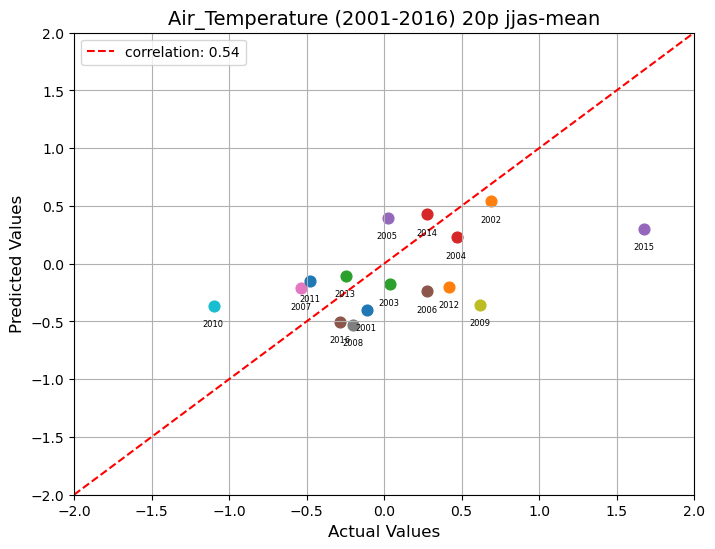

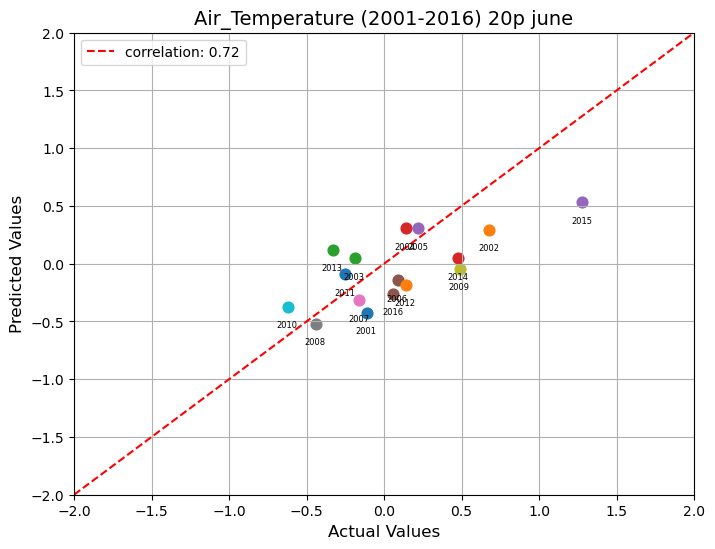

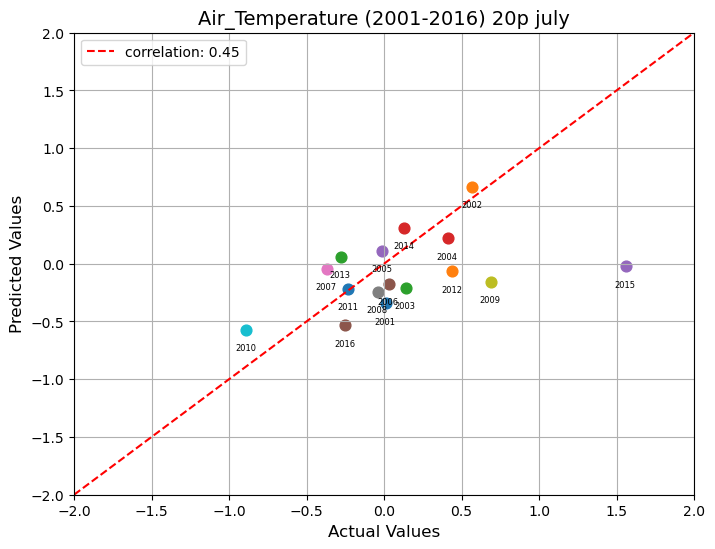

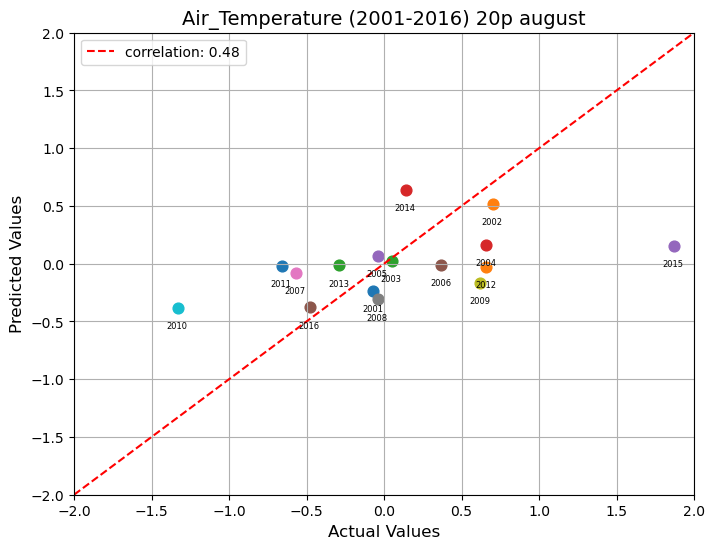

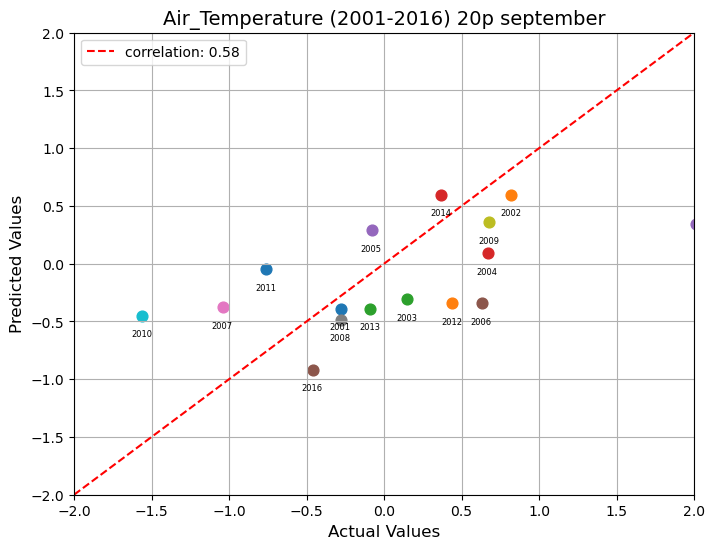

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()